In [1]:
import sys
import os
sys.path.append(os.path.abspath("../src"))  # Adds 'src' to the module search path

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plot import barplot,vertical_boxplot,plot_sequences_split
import numpy as np

# Dataset properties

In [21]:
np.random.seed(42)
HOME_DIR = "../"

In [22]:
df = pd.read_parquet(f"{HOME_DIR}raw_data/80_tasks.parquet",engine="pyarrow")

In [23]:
df.head()

,filename,task_id,dataset,scan_nr,sequence,charge,mz,RT,iRT
0,131023_Sunil_PPT_Brain_A_02.mzML,216baaa4a7e842e2ae54d0fbef26d1cc,MSV000080692,5797,MQIFVK,2,383.21970,24.338255,52.767529
1,131023_Sunil_PPT_Brain_A_02.mzML,216baaa4a7e842e2ae54d0fbef26d1cc,MSV000080692,10965,FLGFFK,2,380.21524,39.359713,107.360574
2,131023_Sunil_PPT_Brain_A_02.mzML,216baaa4a7e842e2ae54d0fbef26d1cc,MSV000080692,9855,REVILNKST,2,552.31410,36.440266,96.750319
3,131023_Sunil_PPT_Brain_A_02.mzML,216baaa4a7e842e2ae54d0fbef26d1cc,MSV000080692,15548,LQGIVSWGSGCAQK,2,745.87384,51.097828,150.020844
4,131023_Sunil_PPT_Brain_A_02.mzML,216baaa4a7e842e2ae54d0fbef26d1cc,MSV000080692,12335,FPFFLR,2,413.73434,42.881750,120.160845


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23487532 entries, 0 to 23487531
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   filename  object 
 1   task_id   object 
 2   dataset   object 
 3   scan_nr   int64  
 4   sequence  object 
 5   charge    int64  
 6   mz        float64
 7   RT        float64
 8   iRT       float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1.6+ GB


In [25]:
df[['task_id','filename','dataset','sequence']].nunique()

task_id         80
filename      1329
dataset         29
sequence    691476
dtype: int64

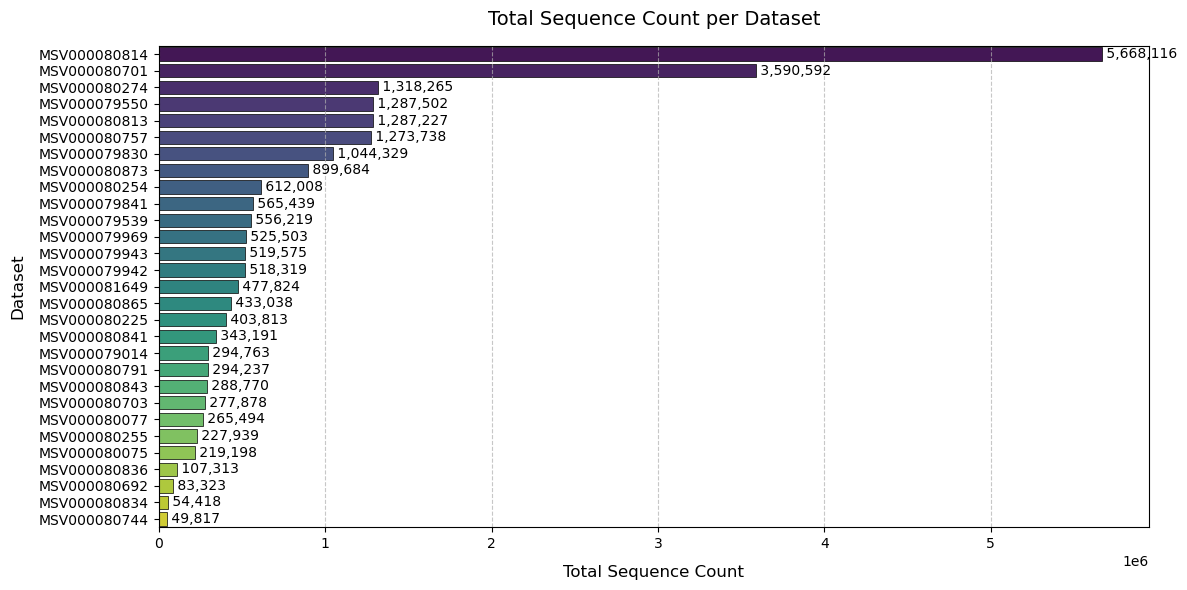

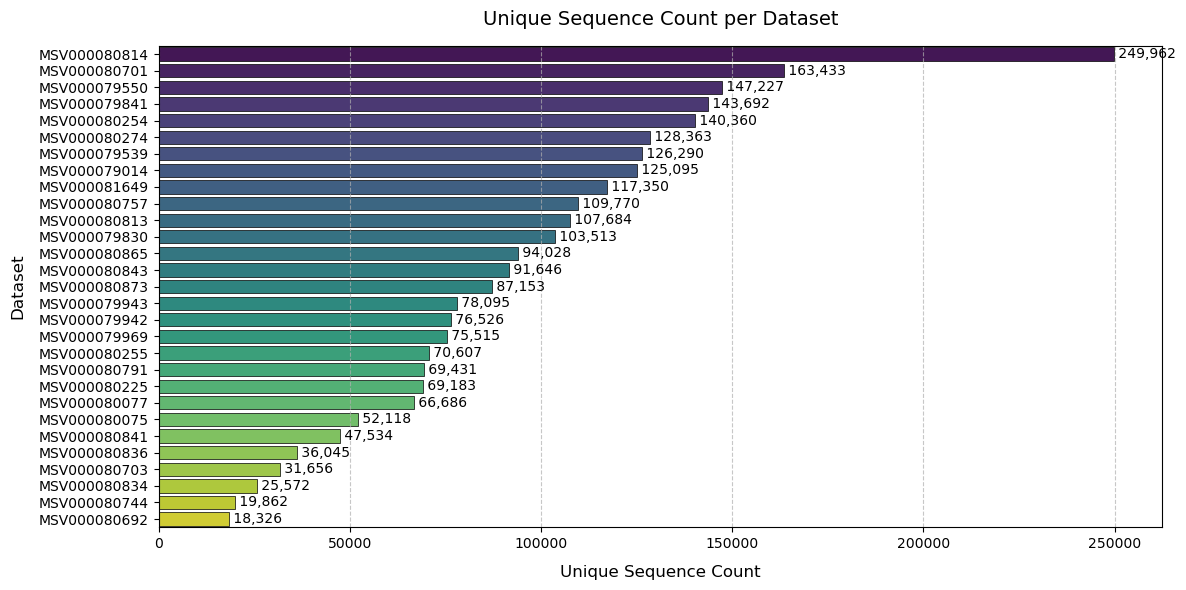

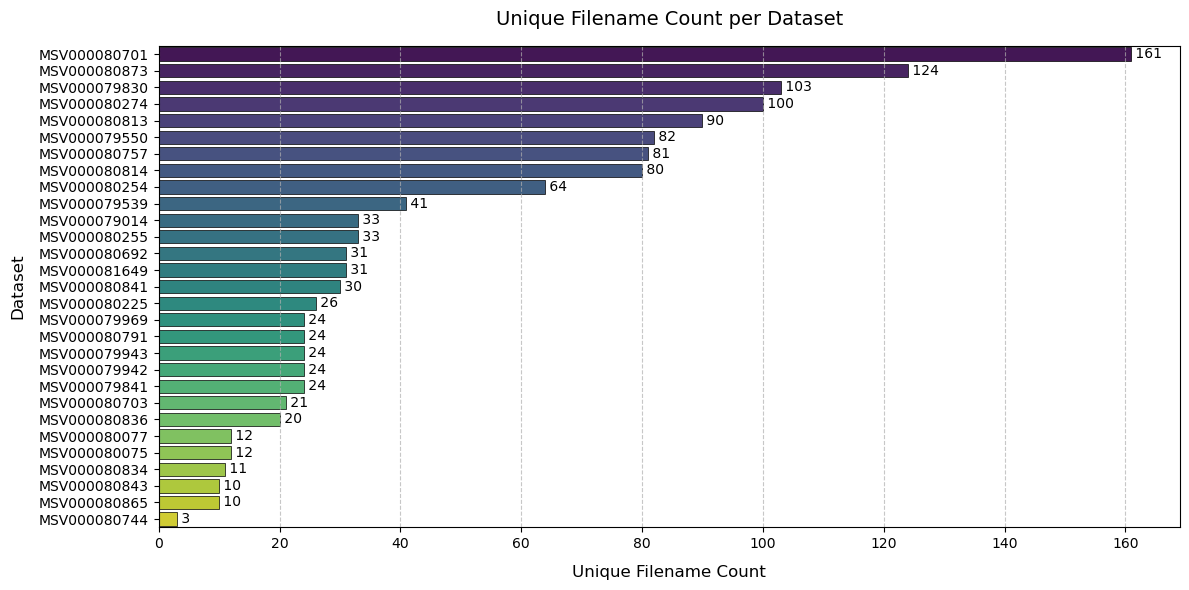

In [26]:
sequences_dataset = df.groupby('dataset')['sequence'].count()
barplot(
    sequences_dataset,
    xlabel="Total Sequence Count",
    ylabel="Dataset",
    title="Total Sequence Count per Dataset"
)
# 2. Unique sequence counts
unique_sequences_dataset = df.groupby('dataset')['sequence'].nunique()
barplot(
    unique_sequences_dataset,
    xlabel="Unique Sequence Count",
    ylabel="Dataset",
    title="Unique Sequence Count per Dataset"
)
unique_filenames_dataset = df.groupby('dataset')['filename'].nunique()
barplot(
    unique_filenames_dataset,
    xlabel="Unique Filename Count",
    ylabel="Dataset",
    title="Unique Filename Count per Dataset"
)

# Data split analysis

In [14]:
PARQUET_FILES = "../data/parquet/"

In [16]:
train_df = pd.read_parquet(f"{PARQUET_FILES}train.parquet",engine="pyarrow")
val_df = pd.read_parquet(f"{PARQUET_FILES}val.parquet",engine="pyarrow")
test_df = pd.read_parquet(f"{PARQUET_FILES}test.parquet",engine="pyarrow")

<module 'matplotlib.pyplot' from 'C:\\Users\\lambe\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

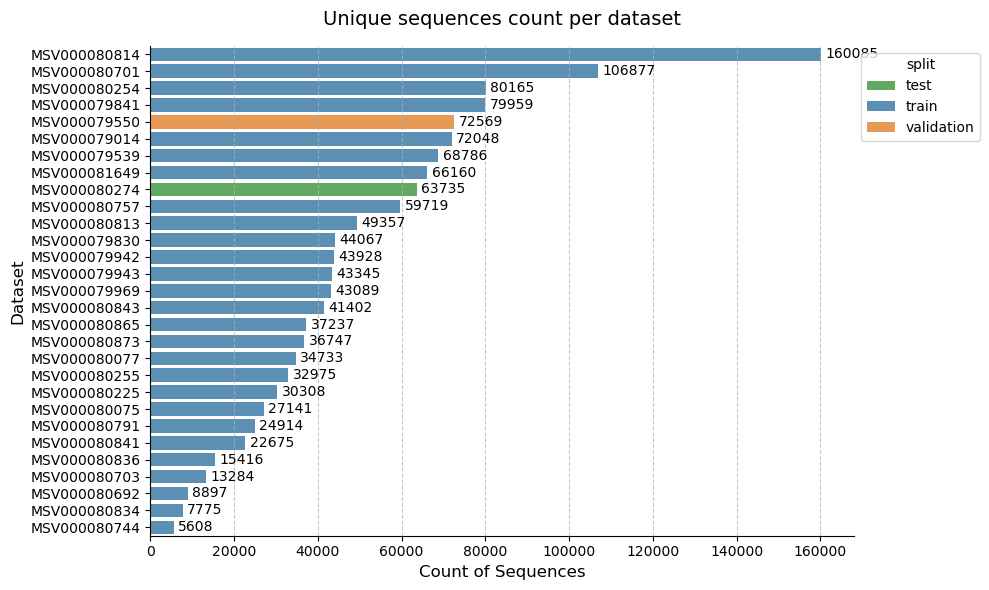

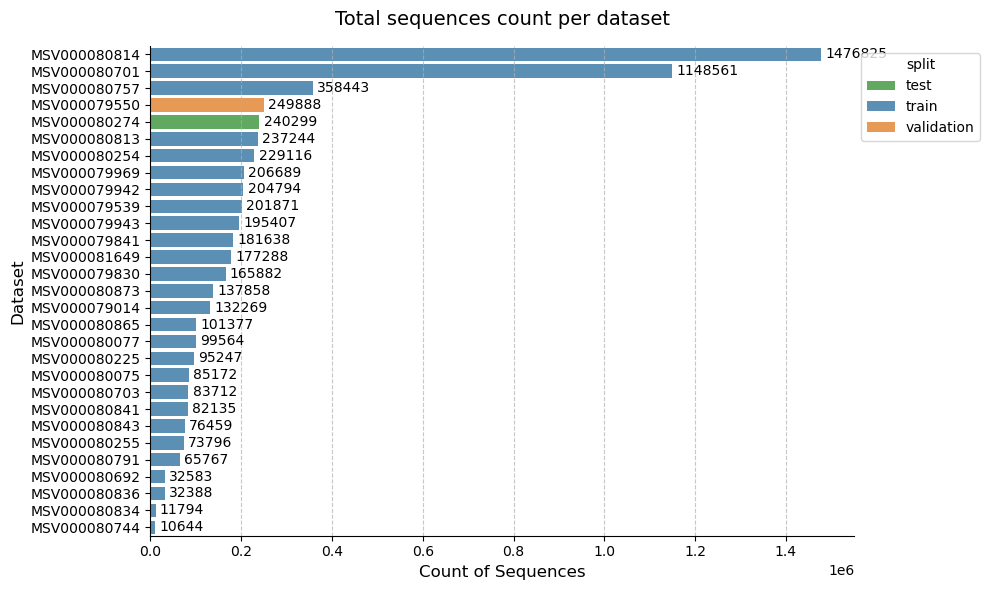

In [24]:
plot_sequences_split(train_df, val_df, test_df,title ="Unique sequences count per dataset")
plot_sequences_split(train_df, val_df, test_df,use_unique=False,title ="Total sequences count per dataset")